# **COVID 19 Lung Damage Detection using Convolutional Neural Networks  and Data Augmentation**

- Below 5 cells of codes is to fetch Kaggle Datasets into Google Colab directly

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
#%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

In [ ]:
#!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

# **1. Data Preprocessing** 
o Data Reading   
o Data Visualization   
o Feature Extraction  
o Standardisation / Normalization

# **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2
import os

# **Normalization**

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

#  **Data Reading**

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
val_dataset = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
test_dataset = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_mode

'binary'

In [ ]:
train_dataset.color_mode

'rgb'

In [ ]:
val_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
(train_dataset.classes)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
len(train_dataset.classes)

5216

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')

In [ ]:
img.shape

(1416, 1776, 3)

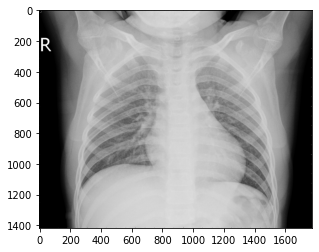

In [ ]:
plt.imshow(img)

In [ ]:
img = image.load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')

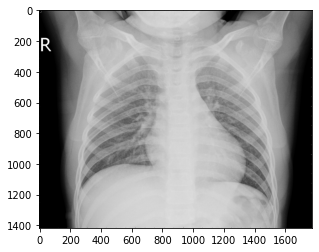

In [ ]:
plt.imshow(img)

#  **Data visualization**

In [ ]:
os.listdir('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL')

['NORMAL2-IM-1431-0001.jpeg',
 'NORMAL2-IM-1440-0001.jpeg',
 'NORMAL2-IM-1436-0001.jpeg',
 'NORMAL2-IM-1438-0001.jpeg',
 'NORMAL2-IM-1427-0001.jpeg',
 '.DS_Store',
 'NORMAL2-IM-1430-0001.jpeg',
 'NORMAL2-IM-1442-0001.jpeg',
 'NORMAL2-IM-1437-0001.jpeg']

X-rays of Normal Person


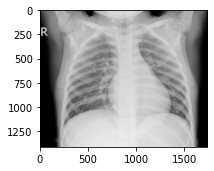

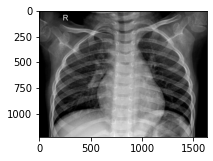

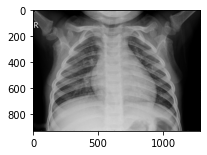

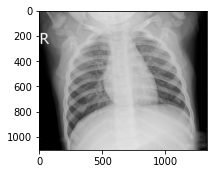

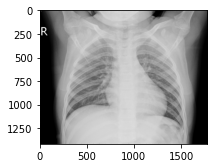

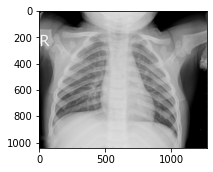

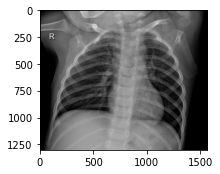

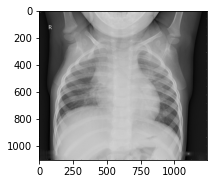

In [ ]:
dir_path_normal = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL'
print("X-rays of Normal Person")
for i in os.listdir(dir_path_normal):
  if i != '.DS_Store':
    img=image.load_img(dir_path_normal+'//'+i)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()
    #count +=1

In [ ]:
dir_path_pneumonia = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/PNEUMONIA'
os.listdir(dir_path_pneumonia)

['person1954_bacteria_4886.jpeg',
 'person1951_bacteria_4882.jpeg',
 'person1946_bacteria_4874.jpeg',
 'person1947_bacteria_4876.jpeg',
 '.DS_Store',
 'person1946_bacteria_4875.jpeg',
 'person1949_bacteria_4880.jpeg',
 'person1952_bacteria_4883.jpeg',
 'person1950_bacteria_4881.jpeg']

X-rays of Pneumonia Person


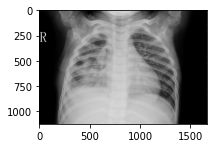

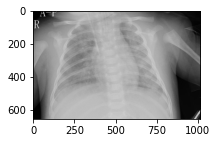

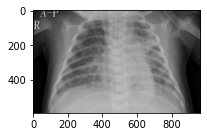

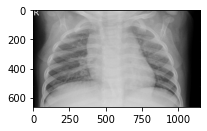

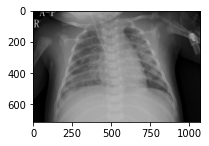

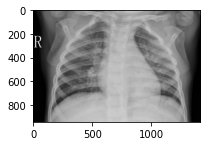

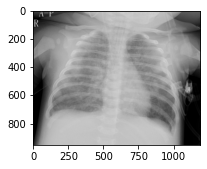

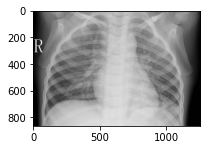

In [ ]:
dir_path_pneumonia = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/PNEUMONIA'
print("X-rays of Pneumonia Person")

for i in os.listdir(dir_path_pneumonia):
  if i != '.DS_Store':
    img=image.load_img(dir_path_pneumonia+'//'+i)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()
    #count +=1

#  **Feature Extraction**

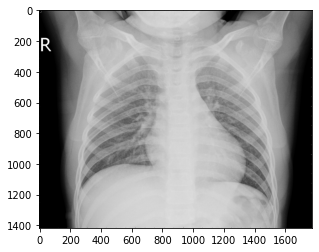

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
plt.imshow(img)

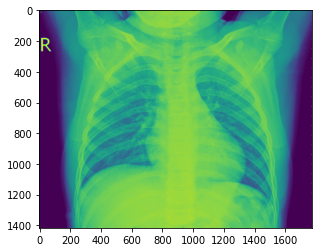

In [ ]:
from skimage.io import imread, imshow
img = imread('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',as_gray=True)
plt.imshow(img)

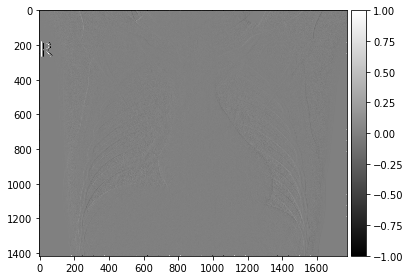

In [ ]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
img = imread('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(img)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(img)

imshow(edges_prewitt_vertical, cmap='gray')

In [ ]:
 import numpy as np
 from scipy.ndimage.interpolation import zoom
 import Image 
 zoom_factor = 0.05 # 5% of the original image 
 img = Image.open(filename)
 image_array = misc.fromimage(img)
 zoomed_img = clipped_zoom(image_array, zoom_factor)
 misc.imsave('output.png', zoomed_img)

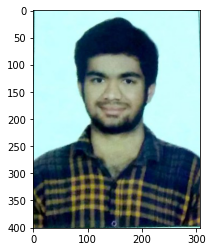

In [ ]:
mypic=image.load_img('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg')
plt.imshow(mypic)

In [ ]:
mypic.shape  #shoulb be converted into array

AttributeError: ignored

In [ ]:
mypic=img_to_array(mypic)
mypic.shape

(401, 307, 3)

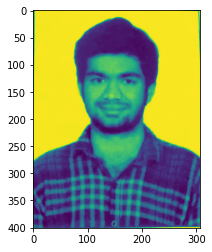

In [ ]:
from skimage.io import imread, imshow
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg',as_gray=True)
plt.imshow(mypic)

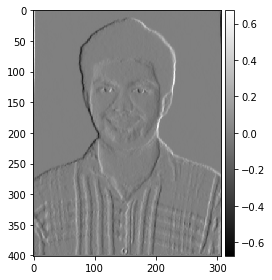

In [ ]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(mypic)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(mypic)

imshow(edges_prewitt_vertical, cmap='gray')

- **Why it should be in Gray?**

(401, 307, 3)
3


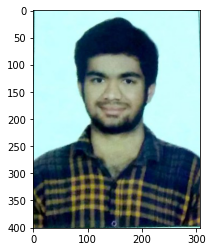

In [ ]:
from skimage.io import imread, imshow
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg')
plt.imshow(mypic)
print(mypic.shape)
print(mypic.ndim)

(401, 307)
2


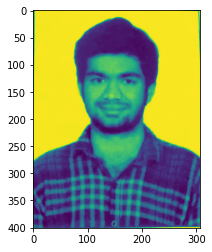

In [ ]:
from skimage.io import imread, imshow
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg',as_gray=True)
plt.imshow(mypic)
print(mypic.shape)
print(mypic.ndim)

In [ ]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg')  # we will be getting error because it is in 3-Dimensional array

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(mypic)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(mypic)

imshow(edges_prewitt_vertical)

ValueError: ignored

- Here we are getting error because the image is in 3-Dimensional Array for Feature Extraction the image shoulb be in **`2-Dimensional Array`** when **`as_gray=True`** then it converts to 3-D Array to 2-D Array

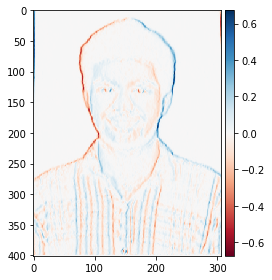

In [ ]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(mypic)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(mypic)

imshow(edges_prewitt_vertical)

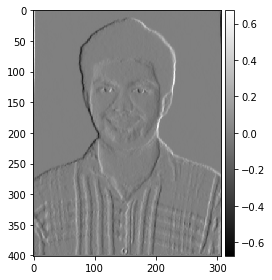

In [ ]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
mypic = imread('/content/drive/MyDrive/Kaggle/My Pic/photograph.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(mypic)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(mypic)

imshow(edges_prewitt_vertical, cmap='gray')

# **Data Augmentation.**  
o Rotation  
o Flipping  
o Zooming  
o Horizontal/vertical shift 

# **Rotation**

Text(0.5, 1.0, 'Original')

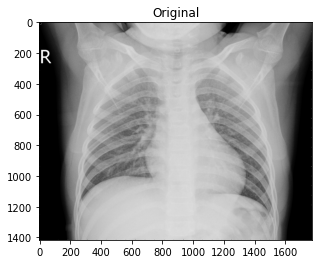

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
plt.imshow(img)
plt.title("Original")

Text(0.5, 1.0, '90° Clockwise Rotation')

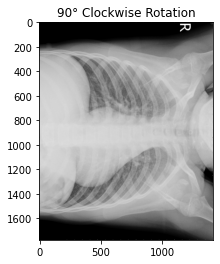

In [ ]:
rot=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rot)
plt.title("90° Clockwise Rotation")

Text(0.5, 1.0, 'Upside Down')

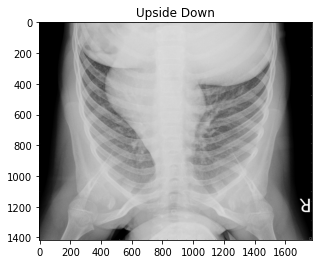

In [ ]:
rot=cv2.rotate(img,cv2.ROTATE_180)
plt.imshow(rot)
plt.title("Upside Down")

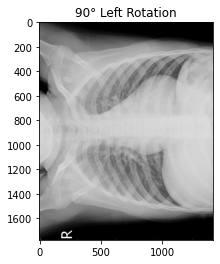

In [ ]:
rot=cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.title("90° Left Rotation")
plt.imshow(rot)

# **Flipping**

Text(0.5, 1.0, 'Original Image')

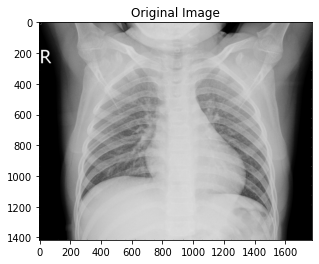

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
plt.imshow(img)
plt.title("Original Image")

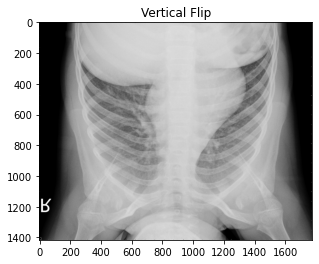

In [ ]:
flip=cv2.flip(img,0)
plt.title("Vertical Flip")
plt.imshow(flip)

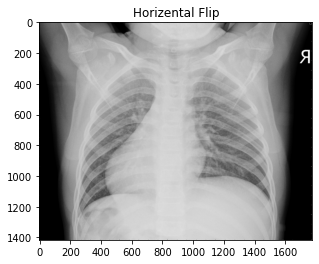

In [ ]:
flip=cv2.flip(img,1)
plt.title("Horizental Flip")
plt.imshow(flip)

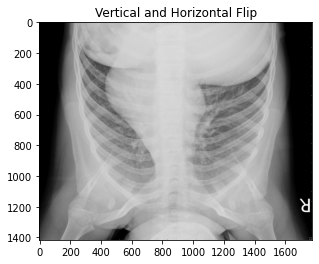

In [ ]:
flip=cv2.flip(img,-1)
plt.title("Vertical and Horizontal Flip")
plt.imshow(flip)

# **Zooming**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(zoom_range=0.7)

im = load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
imgx=img_to_array(im)
imgx=imgx.reshape((1,) + imgx.shape)

i = 0
for batch in datagen.flow(imgx,batch_size=3,save_to_dir='/content/drive/MyDrive/Kaggle/Data Augmentation Pics/Zooming', save_prefix='Zooming',save_format='jpeg'):
  i += 2
  if i > 2:
    break

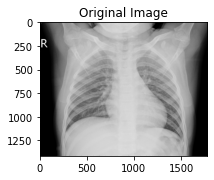

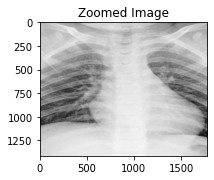

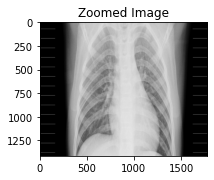

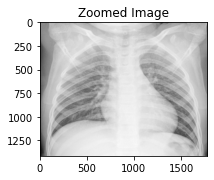

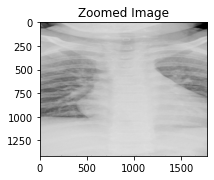

In [ ]:
imgoriginal=image.load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
plt.figure(figsize=(3,3))
plt.subplot(1,1,1)
plt.title("Original Image")
plt.imshow(imgoriginal)
dir_path = '/content/drive/MyDrive/Kaggle/Data Augmentation Pics/Zooming'

#j=0
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i)
    plt.figure(figsize=(3,3))
    #plt.subplot(2,4,j+1)
    plt.title('Zoomed Image')
    plt.imshow(img)
    #plt.show()

# **Horizontal/Vertical Shifting**

## **Horizontal Shift**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(width_shift_range=0.3)

im = load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
imgx=img_to_array(im)
imgx=imgx.reshape((1,)+imgx.shape)

i = 0
for batch in datagen.flow(imgx,batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Kaggle/Data Augmentation Pics', save_prefix='horizontal',save_format='jpeg'):
  i += 1
  if i > 1:
    break

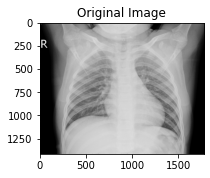

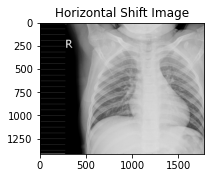

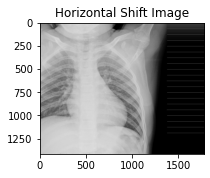

In [ ]:
imgoriginal=image.load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(imgoriginal)
dir_path = '/content/drive/MyDrive/Kaggle/Data Augmentation Pics/Horizontal shift'
j=2
for i in os.listdir(dir_path):
  if i != '.DS_Store':
    img=image.load_img(dir_path+'//'+i)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,j)
    plt.title('Horizontal Shift Image')
    plt.imshow(img)
    plt.show()
  j = j+1

## **Vertical Shift**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(height_shift_range=0.5)

im = load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
imgx=img_to_array(im)
imgx=imgx.reshape((1,)+imgx.shape)

i = 0
for batch in datagen.flow(imgx,batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Kaggle/Data Augmentation Pics/Vertical Shift', save_prefix='Vertical',save_format='jpeg'):
  i += 1
  if i > 2:
    break

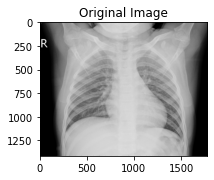

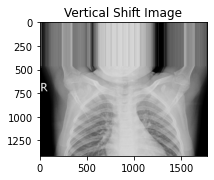

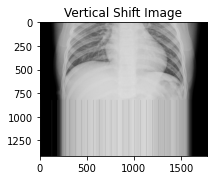

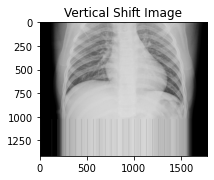

In [ ]:
imgoriginal=image.load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
plt.figure(figsize=(3,3))
plt.subplot(1,1,1)
plt.title("Original Image")
plt.imshow(imgoriginal)
dir_path = '/content/drive/MyDrive/Kaggle/Data Augmentation Pics/Vertical Shift'
j=2
for i in os.listdir(dir_path):
  if i != '.DS_Store':
    img=image.load_img(dir_path+'//'+i)
    plt.figure(figsize=(3,3))
    #plt.subplot(1,3,j)
    plt.title('Vertical Shift Image')
    plt.imshow(img)
    plt.show()
  #j = j+1